# Figure processing for Manuscript

In [1]:
sChart = '/project/bioinformatics/DLLab/Cooper/Manuscripts/ISBI_2019/ISBI_Initial_Submit/ISBI Paper All Downloads/ISBI_Final/HeatMapFinalForPaperWithBrainNet_AAM.xlsx'

In [2]:
import pandas as pd
pdData=pd.read_excel(sChart)
pdData

,Unnamed: 0,Unnamed: 1,Nonlinear Models,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Linear Models,Unnamed: 9,Unnamed: 10,Deep Models,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,Naïve Bayes,Random Forest,Extremely Randomized Trees,Adaptive Boosting,Gradient Boosting,SVM with \nGaussian Kernel,SVM with\nLinear Kernel,Logistic Regression with Lasso,Logistic Regression with Ridge,Dense FeedFWD\nNetwork,LSTM RNN,BrainNetCNN\ngraph convolution,Highest Area Under ROC Curve
1,SMRI Structural Data Alone,Anatomical Volumetric Data,0.53337,0.5303,0.58117,0.56584,0.625,0.54708,0.59073,0.578644,0.602633,0.628367,0.63696,NaN,NaN
2,rs-fMRI Connectivity Data Calculated With One ...,BASC Atlas with 64 ROIs,0.67406,0.58784,0.57143,0.65206,0.62644,0.67136,0.65945,0.674062,0.669553,0.733886,0.75878,0.662698,NaN
3,NaN,BASC Atlas with 122 ROIs,0.62734,0.57143,0.54167,0.58874,0.66486,0.6535,0.69751,0.65386,0.693362,0.768038,0.77477,0.683862,NaN
4,NaN,BASC Atlas with 197 ROIs,0.63059,0.55357,0.55952,0.60859,0.63943,0.70112,0.68416,0.630411,0.689214,0.763949,0.7785,0.653439,NaN
5,NaN,Craddock Atlas with 249 ROIs,0.61508,0.52381,0.52381,0.58658,0.61057,0.64376,0.6369,0.624098,0.630051,0.739658,0.72138,0.604978,NaN
6,NaN,Harvard-Oxford Atlas with 69 ROIs,0.6553,0.58099,0.56548,0.61995,0.51912,0.61364,0.60949,0.570887,0.612193,0.642977,0.66667,0.661616,NaN
7,NaN,MSDL Atlas with 39 ROIs,0.65386,0.57684,0.51786,0.57179,0.60263,0.65079,0.62915,0.602092,0.613636,0.660293,0.66919,0.62987,NaN
8,NaN,Power Atlas with 264 ROIs,0.61778,0.52976,0.5,0.61129,0.60317,0.6746,0.68146,0.604618,0.680556,0.727273,0.73858,0.582011,NaN
9,Combined rs-fMRI Connectivity Data and sMRI St...,Anatomical Data with the BASC Atlas - 64 ROIs,0.60516,0.58189,0.57233,0.63005,0.66216,0.70527,0.69012,0.650253,0.689214,0.77381,0.76587,NaN,NaN


In [27]:
#reformat for plotting
pdPlot = pdData.iloc[:,1:-1]
pdPlot.columns=pdData.iloc[0,1:-1]
pdPlot.drop(index=pdPlot.iloc[:1,0].index.tolist(), inplace=True)
pdPlot = pdPlot.set_index([pdPlot.columns[0]])
pdPlot.index.name='Atlas'
pdPlot['Atlas']=pdPlot.index

In [28]:
pdPlot=pd.melt(pdPlot, id_vars=['Atlas'])
pdPlot.columns=['Atlas', 'Method', 'AUROC']
pdPlot=pdPlot[~pdPlot['AUROC'].isnull()]

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from heatmap import heatmap, corrplot
import seaborn as sns

In [29]:
pdPlot

,Atlas,Method,AUROC
0,Anatomical Volumetric Data,Naïve Bayes,0.53337
1,BASC Atlas with 64 ROIs,Naïve Bayes,0.67406
2,BASC Atlas with 122 ROIs,Naïve Bayes,0.62734
3,BASC Atlas with 197 ROIs,Naïve Bayes,0.63059
4,Craddock Atlas with 249 ROIs,Naïve Bayes,0.61508
...,...,...,...
168,BASC Atlas with 197 ROIs,BrainNetCNN\ngraph convolution,0.653439
169,Craddock Atlas with 249 ROIs,BrainNetCNN\ngraph convolution,0.604978
170,Harvard-Oxford Atlas with 69 ROIs,BrainNetCNN\ngraph convolution,0.661616
171,MSDL Atlas with 39 ROIs,BrainNetCNN\ngraph convolution,0.62987


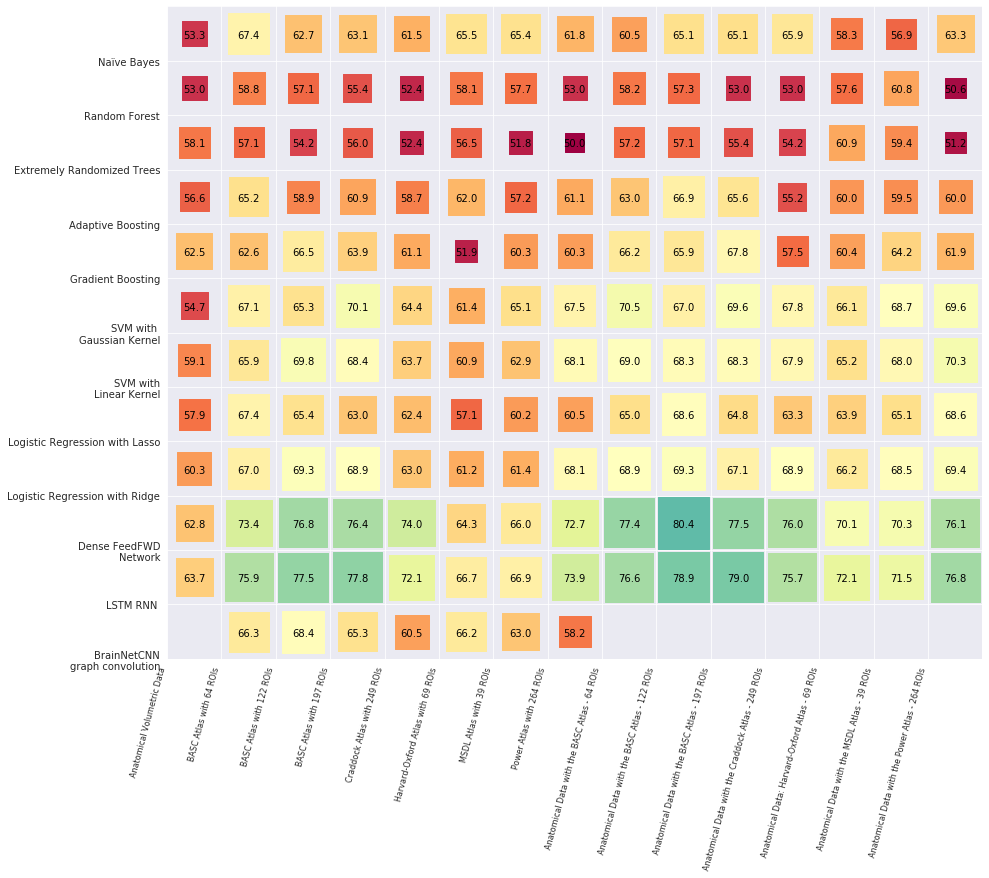

In [44]:
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')

x=pdPlot['Method']
y=pdPlot['Atlas']
x=pdPlot['Atlas']
y=pdPlot['Method']
size=pdPlot['AUROC']

fig, ax = plt.subplots(figsize=(15,12))
x_labels = [v for v in x.unique()]
y_labels = [v for v in y.unique()]

x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
y_to_num = {k:len(y_to_num)-1-v for k,v in y_to_num.items()}



n_colors = 512 # Use 256 colors for the diverging color palette
bReverse=False
# palette = sns.color_palette("icefire", n_colors)
palette=sns.color_palette("Spectral", n_colors)
#palette=sns.light_palette("seagreen", n_colors)
#palette=sns.color_palette("spring", n_colors)
#palette = sns.cubehelix_palette(start=.5, rot=-.75, n_colors=n_colors)# Create the palette
color_min, color_max = [size.min(), 0.875] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1))
    if bReverse:
        return palette[-ind]
    else:
        return palette[ind]

size_scale = 7500
sc=ax.scatter(
    x=[v+0.5 for v in x.map(x_to_num)], # Use mapping for x
    y=[v+0.5 for v in y.map(y_to_num)], # Use mapping for y
    s=[int(x*size_scale-0.9*size.min()*size_scale) for x in size.values], # Vector of square sizes, proportional to size parameter
    marker='s',
    c=size.apply(value_to_color),
    cmap=sns.color_palette("Spectral", n_colors),
    vmin=size.min(),
    vmax=size.max()
)
# fig.colorbar(sc, ax=ax)


# Show column labels on the axes
ax.set_xticks([x_to_num[v] for v in x_labels])
ax.set_xticklabels(x_labels, rotation=75, horizontalalignment='right', size=8)
ax.set_yticks([y_to_num[v] for v in y_labels])
ax.set_ylim(0,len(y_to_num))
ax.set_xlim(0,len(x_to_num))
ax.set_yticklabels(y_labels)

# annotate plot
for iEntry in range(len(x)):
    txt = plt.text(
        np.array([v+0.295 for v in x.map(x_to_num)])[iEntry],
        np.array([v+0.42 for v in y.map(y_to_num)])[iEntry],
        f'{size.values[iEntry]*100:0.1f}', size=10, color='k')
    #txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground=ax.patch.get_facecolor())])
    #txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
ax.set_aspect('equal')
plt.savefig('RoughFig.png', dpi=600)


In [ ]:
#Now do the 2 atlas comparison supplementary:

In [49]:
pdSupplement=pd.read_excel('Manuscript_2AtlasSupplement.xlsx', index_col=0)

In [68]:
pdSupplement['Atlas2']=pdSupplement.index
pdPlot=pd.melt(pdSupplement, id_vars=['Atlas2'])
pdPlot.columns=['Lower Atlas', 'Upper Atlas', 'AUROC']
pdPlot=pdPlot[~pdPlot['AUROC'].isnull()]

In [94]:
x_labels

['BASC Atlas with 64 regions',
 'BASC Atlas with 122 regions',
 'BASC Atlas with 197 regions',
 'Craddock Atlas with 249 regions',
 'Harvard-Oxford Atlas with 69 regions',
 'MSDL Atlas with 39 regions',
 'Power Atlas with 264 regions']

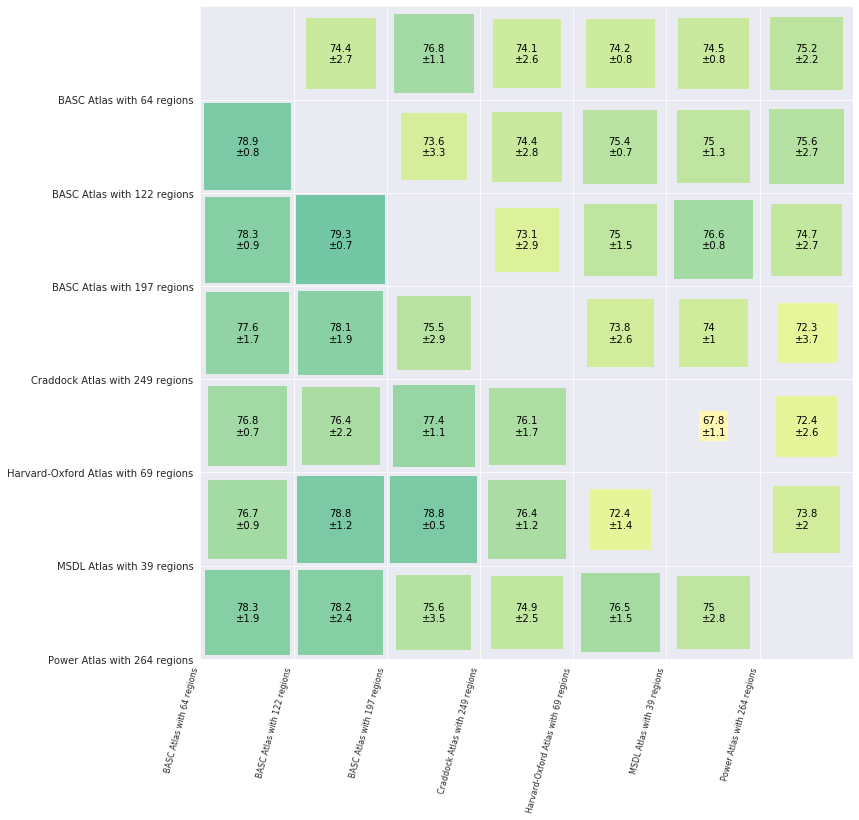

In [96]:
import matplotlib.patheffects as PathEffects
import seaborn as sns
import copy
sns.set_style('darkgrid')

x=pdPlot['Upper Atlas']
y=pdPlot['Lower Atlas']
size=copy.deepcopy(pdPlot['AUROC'])
size.iloc[:]=[float(x.split('±')[0]) for x in size.values]

fig, ax = plt.subplots(figsize=(15,12))
x_labels = [v for v in x.unique()]
y_labels = x_labels

x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
y_to_num = {k:len(y_to_num)-1-v for k,v in y_to_num.items()}
# x_to_num = {k:len(x_to_num)-1-v for k,v in x_to_num.items()}


n_colors = 512 # Use 256 colors for the diverging color palette
bReverse=False
# palette = sns.color_palette("icefire", n_colors)
palette=sns.color_palette("Spectral", n_colors)
#palette=sns.light_palette("seagreen", n_colors)
#palette=sns.color_palette("spring", n_colors)
#palette = sns.cubehelix_palette(start=.5, rot=-.75, n_colors=n_colors)# Create the palette
color_min, color_max = [size.min(), size.max()] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
color_min, color_max = [50, 87.5] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1))
    if bReverse:
        return palette[-ind]
    else:
        return palette[ind]

size_scale = 600
sc=ax.scatter(
    x=[v+0.5 for v in x.map(x_to_num)], # Use mapping for x
    y=[v+0.5 for v in y.map(y_to_num)], # Use mapping for y
    s=[int(x*size_scale-0.98*size.min()*size_scale) for x in size.values], # Vector of square sizes, proportional to size parameter
    marker='s',
    c=size.apply(value_to_color),
    cmap=sns.color_palette("Spectral", n_colors),
    vmin=size.min(),
    vmax=size.max()
)
# fig.colorbar(sc, ax=ax)


# Show column labels on the axes
ax.set_xticks([x_to_num[v] for v in x_labels])
ax.set_xticklabels(x_labels, rotation=75, horizontalalignment='right', size=8)
ax.set_yticks([y_to_num[v] for v in y_labels])
ax.set_ylim(0,len(y_to_num))
ax.set_xlim(0,len(x_to_num))
ax.set_yticklabels(y_labels)

# annotate plot
for iEntry in range(len(x)):
    txt = plt.text(
        np.array([v+0.38 for v in x.map(x_to_num)])[iEntry],
        np.array([v+0.40 for v in y.map(y_to_num)])[iEntry],
        f'{pdPlot["AUROC"].iloc[iEntry]}'.replace("±","\n±"), size=10, color='k')
    #txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground=ax.patch.get_facecolor())])
    #txt.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='k')])
ax.set_aspect('equal')
plt.savefig('RoughSupplementFig.png', dpi=600)


In [ ]:








color_min, color_max = [size.min(), 0.875] # Range of values that will be mapped to the palette, i.e. min and max possible correlation

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1))
    if bReverse:
        return palette[-ind]
    else:
        return palette[ind]
lsVal=np.linspace(size.min(), size.max(), 1000)

mpl.colors.LinearSegmentedColormap('my_colormap', lsColors, 256)

In [ ]:
import matplotlib as mpl
lsColors=[value_to_color(v) for v in lsVal]
cmap = lsColors
mpl.colorbar.ColorbarBase(ax, cmap=mpl.colors.LinearSegmentedColormap('my_colormap', lsColors, 256))


In [ ]:
lsColors

In [ ]:
from PIL import Image
im=Image.new('RGB', (len(lsColors), 62))
ld=im.load()
for x in range(len(lsColors)):
    for y in range(62):
        ld[x, y]=(int(lsColors[x][0]*256), int(lsColors[x][1]*256), int(lsColors[x][2]*256))


In [ ]:
im.save("ASD_Manuscript_Colorbar.png")

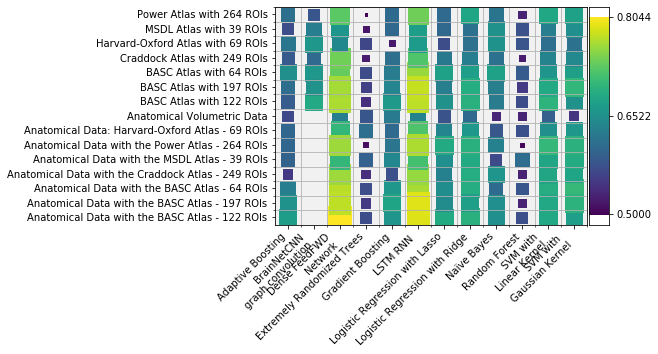

In [7]:
pdPlot.dropna(inplace=True)
heatmap(pdPlot['Method'], pdPlot['Atlas'], size=pdPlot['AUROC'].values/10, color=pdPlot['AUROC'], palette = sns.color_palette("viridis", 256) )